# Proyecto del Día 18 - Analizar una Base de Datos de Perros

Hoy vamos a realizar un proyecto muy entretenido, que consiste en conseguir un dataset sobre razas de perros, que se encuentra alojada en el sitio [The Dog Api](https://thedogapi.com/).

Tu misión consiste en lograr obtener un dataset que contiene información sobre razas de perro ("breeds"), y crear visualizaciones que permitan responder algunas preguntas sobre la **expectativa de vida**, y el **temperamento** más frecuente entre todas las **razas**.


### Preguntas a responder
1. ¿Cuál es la esperanza de vida (en años) más frecuente entre todas las razas de perro?
2. ¿Cuál es el temperamento más frecuente entre todas las razas de perros?


### Pasos sugeridos para llegar hasta la respuesta
1. Descarga las **librerías** necesarias.
2. Explora el sitio [https://thedogapi.com/](https://thedogapi.com/) para identificar dónde y cómo se describe el funcionamiento de su API. Identifica la **API específica** con información sobre **razas** ("breeds"). Una vez que lo hagas, implementa la API y guarda esos datos en un **DataFrame** de Pandas.
*Nota: como todo sitio nuevo al que enfrentes, deberás resolver desafíos particulares. En este caso presta atención a las instrucciones que mencionan algo sobre cómo usar los mismos protocolos que se utilizan en la API de gatos de la misma organización*.
3. Realiza un **análisis exploratorio** para conocer la estrucutra y calidad de tus datos.
4. Implementa la **limpieza de datos** que consideres necesaria.
5. Crea los **gráficos** que creas necesarios para poder visualizar con claridad la respuesta a las preguntas.

Te deseo mucho aprendizaje, pero sobre todo, mucha diversión.
¡Adelante!

In [57]:
import requests
import pandas as pd
import matplotlib.pylab as plt
import re
import seaborn as sns

In [14]:
api_key = "live_YMpQF2YCFVJZlG7xEDcSGmUMkPQ3d5ydHcnMmfjX26XcdkBZ9TbifqGcUas5anlp"
url = f"https://api.thedogapi.com/v1/breeds"
headers = {
    'x-api-key': api_key
}

In [17]:
response = requests.get(url, headers=headers)

In [19]:
if response.status_code == 200:
    datos = response.json()
    print(datos)
else:
    print(f"Surgio un error al obtener los datos: {response.status_code}")

[{'id': '1', 'name': 'Affenpinscher', 'species_id': '2', 'life_span': '12-15', 'temperament': 'Confident, alert, playful, loyal, courageous', 'origin': 'Germany', 'country_codes': 'DE', 'country_code': 'DE', 'description': 'Small, sturdy toy breed with a distinctive monkey-like expression and shaggy, wiry coat. Known for its confident, terrier-like personality despite its small size.', 'bred_for': None, 'perfect_for': None, 'breed_group': 'Toy', 'history': "Originating in 17th-century Germany, bred down from larger terriers to be skilled ratters in homes, kitchens and stables. Refined in Munich and Berlin, recognized by AKC in 1936. Name translates to 'monkey-like terrier'.", 'reference_image_id': 'uaRTIWL69C', 'weight': {'imperial': '7-10', 'metric': '3.2-4.5'}, 'height': {'imperial': '9-11.5', 'metric': '23-29'}, 'image': {'id': 'uaRTIWL69C', 'url': 'https://storage.googleapis.com/dog-api-uploads-prod/originals/8009d9ca-3f02-41dc-89fd-c9241027fb96.jpeg', 'width': 1184, 'height': 912}

In [20]:
df = pd.DataFrame(datos)

In [21]:
df

,id,name,species_id,life_span,temperament,origin,country_codes,country_code,description,bred_for,perfect_for,breed_group,history,reference_image_id,weight,height,image
0,1,Affenpinscher,2,12-15,"Confident, alert, playful, loyal, courageous",Germany,DE,DE,"Small, sturdy toy breed with a distinctive mon...",None,None,Toy,"Originating in 17th-century Germany, bred down...",uaRTIWL69C,"{'imperial': '7-10', 'metric': '3.2-4.5'}","{'imperial': '9-11.5', 'metric': '23-29'}","{'id': 'uaRTIWL69C', 'url': 'https://storage.g..."
1,2,Afghan Hound,2,12-15,"Independent, dignified, aloof, loyal, confident",Afghanistan,AF,AF,"Ancient, elegant sighthound with dramatic, flo...",None,None,Hound,Ancient sighthound originating in the mountain...,atummvxJRT,"{'imperial': 'Male: 55-65; Female: 45-55', 'me...","{'imperial': 'Male: 27-29; Female: 25-27', 'me...","{'id': 'atummvxJRT', 'url': 'https://storage.g..."
2,4,Airedale Terrier,2,11-14,"Confident, intelligent, courageous, alert, ene...","Yorkshire, England",GB,GB,"The largest of all terrier breeds, the Airedal...",None,None,Terrier,"Developed in the Aire Valley of Yorkshire, Eng...",H5dFqyAoeZ,"{'imperial': 'Male: 50-70; Female: 40-55', 'me...","{'imperial': 'Male: 23-24; Female: 22-23', 'me...","{'id': 'H5dFqyAoeZ', 'url': 'https://cdn4.thed..."
3,5,Akbash,2,10-12,"Independent, protective, calm, alert, loyal, i...",Western Turkey,TR,TR,"Large, powerful, all-white livestock guardian ...",None,None,Guardian,"Ancient breed developed over 3,000 years ago i...",e8yVyPMX2w,"{'imperial': 'Male: 90-140; Female: 75-105', '...","{'imperial': 'Male: 28-34; Female: 27-32', 'me...","{'id': 'e8yVyPMX2w', 'url': 'https://cdn4.thed..."
4,6,Akita,2,10-13,"Courageous, loyal, dignified, independent, pro...",Japan,JP,JP,"A large, powerful spitz-type dog of Japanese o...",None,None,Working,Ancient Japanese breed developed in the mounta...,t5MVw1i9DV,"{'imperial': 'Male: 100-130; Female: 70-100', ...","{'imperial': 'Male: 26-28; Female: 24-26', 'me...","{'id': 't5MVw1i9DV', 'url': 'https://storage.g..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,259,Wire Fox Terrier,2,12-15,"Alert, confident, energetic, intelligent, playful",England,GB,GB,"Small, compact terrier with distinctive dense ...",None,None,Terrier,Developed in England in the 18th-19th century ...,lYxCEtfMI1,"{'imperial': 'Male: 17-19; Female: 15-17', 'me...","{'imperial': 'Male: 15-15.5; Female: 14-15.5',...","{'id': 'lYxCEtfMI1', 'url': 'https://cdn4.thed..."
165,260,Wirehaired Pointing Griffon,2,12-15,"Friendly, intelligent, eager to please, loyal,...",Netherlands/France,FR,FR,Medium-sized versatile gundog with distinctive...,None,None,Sporting,Developed in the late 19th century by Dutch br...,fMSaUQg2IP,"{'imperial': 'Male: 50-70; Female: 35-60', 'me...","{'imperial': 'Male: 22-24; Female: 20-22', 'me...","{'id': 'fMSaUQg2IP', 'url': 'https://cdn4.thed..."
166,261,Wirehaired Vizsla,2,12-14,"Energetic, loyal, intelligent, affectionate, g...",Hungary,HU,HU,Medium-sized Hungarian sporting dog with a dis...,None,None,Sporting,Developed in Hungary in the 1930s by crossing ...,kjHLge9m58,"{'imperial': 'Male: 55-65; Female: 45-55', 'me...","{'imperial': 'Male: 23-25; Female: 21.5-23', '...","{'id': 'kjHLge9m58', 'url': 'https://cdn4.thed..."
167,262,Xoloitzcuintli,2,NaN,"Calm, loyal, alert, intelligent, affectionate,...",Mexico,MX,MX,Ancient hairless breed from Mexico available i...,None,None,Non-Sporting,"Ancient breed dating back over 3,000 years wit...",owYeoJuOc7,"{'imperial': '10-55', 'metric': '4.5-25'}","{'imperial': '10-23.5', 'metric': '25-60'}","{'id': 'owYeoJuOc7', 'url': 'https://cdn4.thed..."


In [22]:
df.head()

,id,name,species_id,life_span,temperament,origin,country_codes,country_code,description,bred_for,perfect_for,breed_group,history,reference_image_id,weight,height,image
0,1,Affenpinscher,2,12-15,"Confident, alert, playful, loyal, courageous",Germany,DE,DE,"Small, sturdy toy breed with a distinctive mon...",None,None,Toy,"Originating in 17th-century Germany, bred down...",uaRTIWL69C,"{'imperial': '7-10', 'metric': '3.2-4.5'}","{'imperial': '9-11.5', 'metric': '23-29'}","{'id': 'uaRTIWL69C', 'url': 'https://storage.g..."
1,2,Afghan Hound,2,12-15,"Independent, dignified, aloof, loyal, confident",Afghanistan,AF,AF,"Ancient, elegant sighthound with dramatic, flo...",None,None,Hound,Ancient sighthound originating in the mountain...,atummvxJRT,"{'imperial': 'Male: 55-65; Female: 45-55', 'me...","{'imperial': 'Male: 27-29; Female: 25-27', 'me...","{'id': 'atummvxJRT', 'url': 'https://storage.g..."
2,4,Airedale Terrier,2,11-14,"Confident, intelligent, courageous, alert, ene...","Yorkshire, England",GB,GB,"The largest of all terrier breeds, the Airedal...",None,None,Terrier,"Developed in the Aire Valley of Yorkshire, Eng...",H5dFqyAoeZ,"{'imperial': 'Male: 50-70; Female: 40-55', 'me...","{'imperial': 'Male: 23-24; Female: 22-23', 'me...","{'id': 'H5dFqyAoeZ', 'url': 'https://cdn4.thed..."
3,5,Akbash,2,10-12,"Independent, protective, calm, alert, loyal, i...",Western Turkey,TR,TR,"Large, powerful, all-white livestock guardian ...",None,None,Guardian,"Ancient breed developed over 3,000 years ago i...",e8yVyPMX2w,"{'imperial': 'Male: 90-140; Female: 75-105', '...","{'imperial': 'Male: 28-34; Female: 27-32', 'me...","{'id': 'e8yVyPMX2w', 'url': 'https://cdn4.thed..."
4,6,Akita,2,10-13,"Courageous, loyal, dignified, independent, pro...",Japan,JP,JP,"A large, powerful spitz-type dog of Japanese o...",None,None,Working,Ancient Japanese breed developed in the mounta...,t5MVw1i9DV,"{'imperial': 'Male: 100-130; Female: 70-100', ...","{'imperial': 'Male: 26-28; Female: 24-26', 'me...","{'id': 't5MVw1i9DV', 'url': 'https://storage.g..."


In [25]:
df.description

0      Small, sturdy toy breed with a distinctive mon...
1      Ancient, elegant sighthound with dramatic, flo...
2      The largest of all terrier breeds, the Airedal...
3      Large, powerful, all-white livestock guardian ...
4      A large, powerful spitz-type dog of Japanese o...
                             ...                        
164    Small, compact terrier with distinctive dense ...
165    Medium-sized versatile gundog with distinctive...
166    Medium-sized Hungarian sporting dog with a dis...
167    Ancient hairless breed from Mexico available i...
168    Small toy terrier with long, silky steel blue ...
Name: description, Length: 169, dtype: str

In [27]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  169 non-null    str   
 1   name                169 non-null    str   
 2   species_id          169 non-null    str   
 3   life_span           150 non-null    str   
 4   temperament         169 non-null    str   
 5   origin              169 non-null    str   
 6   country_codes       169 non-null    str   
 7   country_code        169 non-null    str   
 8   description         169 non-null    str   
 9   bred_for            0 non-null      object
 10  perfect_for         0 non-null      object
 11  breed_group         169 non-null    str   
 12  history             169 non-null    str   
 13  reference_image_id  169 non-null    str   
 14  weight              169 non-null    object
 15  height              169 non-null    object
 16  image               169 non-null    o

In [28]:
columnas_interes = ['name', 'life_span', 'temperament', 'bred_for', 'breed_group']
df_limpiado = df[columnas_interes].copy()


In [29]:
df_limpiado

,name,life_span,temperament,bred_for,breed_group
0,Affenpinscher,12-15,"Confident, alert, playful, loyal, courageous",None,Toy
1,Afghan Hound,12-15,"Independent, dignified, aloof, loyal, confident",None,Hound
2,Airedale Terrier,11-14,"Confident, intelligent, courageous, alert, ene...",None,Terrier
3,Akbash,10-12,"Independent, protective, calm, alert, loyal, i...",None,Guardian
4,Akita,10-13,"Courageous, loyal, dignified, independent, pro...",None,Working
...,...,...,...,...,...
164,Wire Fox Terrier,12-15,"Alert, confident, energetic, intelligent, playful",None,Terrier
165,Wirehaired Pointing Griffon,12-15,"Friendly, intelligent, eager to please, loyal,...",None,Sporting
166,Wirehaired Vizsla,12-14,"Energetic, loyal, intelligent, affectionate, g...",None,Sporting
167,Xoloitzcuintli,NaN,"Calm, loyal, alert, intelligent, affectionate,...",None,Non-Sporting


In [38]:
# promedio de vida
df_limpiado["life_span"][0][:2]

'12'

In [40]:
def extraer_prom_vida(life_span):
    if pd.isna(life_span):
        return None
        
    numeros = re.findall(r'\d+', str(life_span))
    
    if len(numeros) >= 2:
        # Si hay rango (ej: 10 - 12), calcular promedio
        return (int(numeros[0]) + int(numeros[1])) / 2
    elif len(numeros) == 1:
        # Si solo hay un número
        return int(numeros[0])
    else:
        return None

In [42]:
df_limpiado['life_span_avg'] = df_limpiado['life_span'].apply(extraer_prom_vida)


In [43]:
df_limpiado

,name,life_span,temperament,bred_for,breed_group,life_span_avg
0,Affenpinscher,12-15,"Confident, alert, playful, loyal, courageous",None,Toy,13.5
1,Afghan Hound,12-15,"Independent, dignified, aloof, loyal, confident",None,Hound,13.5
2,Airedale Terrier,11-14,"Confident, intelligent, courageous, alert, ene...",None,Terrier,12.5
3,Akbash,10-12,"Independent, protective, calm, alert, loyal, i...",None,Guardian,11.0
4,Akita,10-13,"Courageous, loyal, dignified, independent, pro...",None,Working,11.5
...,...,...,...,...,...,...
164,Wire Fox Terrier,12-15,"Alert, confident, energetic, intelligent, playful",None,Terrier,13.5
165,Wirehaired Pointing Griffon,12-15,"Friendly, intelligent, eager to please, loyal,...",None,Sporting,13.5
166,Wirehaired Vizsla,12-14,"Energetic, loyal, intelligent, affectionate, g...",None,Sporting,13.0
167,Xoloitzcuintli,NaN,"Calm, loyal, alert, intelligent, affectionate,...",None,Non-Sporting,NaN


In [47]:
# extraer temperamento
def extraer_temperamento(temperament):
    if pd.isna(temperament):
        return []
    temperamentos = [t.strip() for t in str(temperament).split(',')]
    return temperamentos

df_limpiado["temperament_avg"] = df_limpiado['temperament'].apply(extraer_temperamento)

In [48]:
df_limpiado

,name,life_span,temperament,bred_for,breed_group,life_span_avg,temperament_avg
0,Affenpinscher,12-15,"Confident, alert, playful, loyal, courageous",None,Toy,13.5,"[Confident, alert, playful, loyal, courageous]"
1,Afghan Hound,12-15,"Independent, dignified, aloof, loyal, confident",None,Hound,13.5,"[Independent, dignified, aloof, loyal, confident]"
2,Airedale Terrier,11-14,"Confident, intelligent, courageous, alert, ene...",None,Terrier,12.5,"[Confident, intelligent, courageous, alert, en..."
3,Akbash,10-12,"Independent, protective, calm, alert, loyal, i...",None,Guardian,11.0,"[Independent, protective, calm, alert, loyal, ..."
4,Akita,10-13,"Courageous, loyal, dignified, independent, pro...",None,Working,11.5,"[Courageous, loyal, dignified, independent, pr..."
...,...,...,...,...,...,...,...
164,Wire Fox Terrier,12-15,"Alert, confident, energetic, intelligent, playful",None,Terrier,13.5,"[Alert, confident, energetic, intelligent, pla..."
165,Wirehaired Pointing Griffon,12-15,"Friendly, intelligent, eager to please, loyal,...",None,Sporting,13.5,"[Friendly, intelligent, eager to please, loyal..."
166,Wirehaired Vizsla,12-14,"Energetic, loyal, intelligent, affectionate, g...",None,Sporting,13.0,"[Energetic, loyal, intelligent, affectionate, ..."
167,Xoloitzcuintli,NaN,"Calm, loyal, alert, intelligent, affectionate,...",None,Non-Sporting,NaN,"[Calm, loyal, alert, intelligent, affectionate..."


In [50]:
df_limpiado.drop("bred_for", axis=1)

,name,life_span,temperament,breed_group,life_span_avg,temperament_avg
0,Affenpinscher,12-15,"Confident, alert, playful, loyal, courageous",Toy,13.5,"[Confident, alert, playful, loyal, courageous]"
1,Afghan Hound,12-15,"Independent, dignified, aloof, loyal, confident",Hound,13.5,"[Independent, dignified, aloof, loyal, confident]"
2,Airedale Terrier,11-14,"Confident, intelligent, courageous, alert, ene...",Terrier,12.5,"[Confident, intelligent, courageous, alert, en..."
3,Akbash,10-12,"Independent, protective, calm, alert, loyal, i...",Guardian,11.0,"[Independent, protective, calm, alert, loyal, ..."
4,Akita,10-13,"Courageous, loyal, dignified, independent, pro...",Working,11.5,"[Courageous, loyal, dignified, independent, pr..."
...,...,...,...,...,...,...
164,Wire Fox Terrier,12-15,"Alert, confident, energetic, intelligent, playful",Terrier,13.5,"[Alert, confident, energetic, intelligent, pla..."
165,Wirehaired Pointing Griffon,12-15,"Friendly, intelligent, eager to please, loyal,...",Sporting,13.5,"[Friendly, intelligent, eager to please, loyal..."
166,Wirehaired Vizsla,12-14,"Energetic, loyal, intelligent, affectionate, g...",Sporting,13.0,"[Energetic, loyal, intelligent, affectionate, ..."
167,Xoloitzcuintli,NaN,"Calm, loyal, alert, intelligent, affectionate,...",Non-Sporting,NaN,"[Calm, loyal, alert, intelligent, affectionate..."


In [51]:
df_limpiado.drop("breed_group", axis=1)


,name,life_span,temperament,bred_for,life_span_avg,temperament_avg
0,Affenpinscher,12-15,"Confident, alert, playful, loyal, courageous",None,13.5,"[Confident, alert, playful, loyal, courageous]"
1,Afghan Hound,12-15,"Independent, dignified, aloof, loyal, confident",None,13.5,"[Independent, dignified, aloof, loyal, confident]"
2,Airedale Terrier,11-14,"Confident, intelligent, courageous, alert, ene...",None,12.5,"[Confident, intelligent, courageous, alert, en..."
3,Akbash,10-12,"Independent, protective, calm, alert, loyal, i...",None,11.0,"[Independent, protective, calm, alert, loyal, ..."
4,Akita,10-13,"Courageous, loyal, dignified, independent, pro...",None,11.5,"[Courageous, loyal, dignified, independent, pr..."
...,...,...,...,...,...,...
164,Wire Fox Terrier,12-15,"Alert, confident, energetic, intelligent, playful",None,13.5,"[Alert, confident, energetic, intelligent, pla..."
165,Wirehaired Pointing Griffon,12-15,"Friendly, intelligent, eager to please, loyal,...",None,13.5,"[Friendly, intelligent, eager to please, loyal..."
166,Wirehaired Vizsla,12-14,"Energetic, loyal, intelligent, affectionate, g...",None,13.0,"[Energetic, loyal, intelligent, affectionate, ..."
167,Xoloitzcuintli,NaN,"Calm, loyal, alert, intelligent, affectionate,...",None,NaN,"[Calm, loyal, alert, intelligent, affectionate..."


In [53]:
df_limpiado = df_limpiado.drop(['bred_for', 'breed_group'], axis=1)

In [54]:
df_limpiado

,name,life_span,temperament,life_span_avg,temperament_avg
0,Affenpinscher,12-15,"Confident, alert, playful, loyal, courageous",13.5,"[Confident, alert, playful, loyal, courageous]"
1,Afghan Hound,12-15,"Independent, dignified, aloof, loyal, confident",13.5,"[Independent, dignified, aloof, loyal, confident]"
2,Airedale Terrier,11-14,"Confident, intelligent, courageous, alert, ene...",12.5,"[Confident, intelligent, courageous, alert, en..."
3,Akbash,10-12,"Independent, protective, calm, alert, loyal, i...",11.0,"[Independent, protective, calm, alert, loyal, ..."
4,Akita,10-13,"Courageous, loyal, dignified, independent, pro...",11.5,"[Courageous, loyal, dignified, independent, pr..."
...,...,...,...,...,...
164,Wire Fox Terrier,12-15,"Alert, confident, energetic, intelligent, playful",13.5,"[Alert, confident, energetic, intelligent, pla..."
165,Wirehaired Pointing Griffon,12-15,"Friendly, intelligent, eager to please, loyal,...",13.5,"[Friendly, intelligent, eager to please, loyal..."
166,Wirehaired Vizsla,12-14,"Energetic, loyal, intelligent, affectionate, g...",13.0,"[Energetic, loyal, intelligent, affectionate, ..."
167,Xoloitzcuintli,NaN,"Calm, loyal, alert, intelligent, affectionate,...",NaN,"[Calm, loyal, alert, intelligent, affectionate..."


Text(0, 0.5, 'Freq')

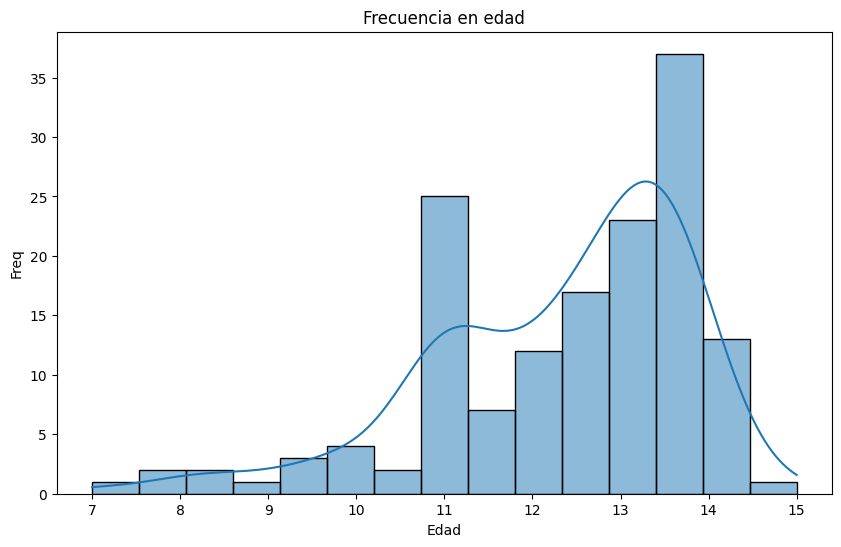

In [64]:
plt.figure(figsize=(10,6))
sns.histplot(df_limpiado["life_span_avg"], kde=True, bins=15)
plt.title("Frecuencia en edad")
plt.xlabel("Edad")
plt.ylabel("Freq")

In [76]:
lista_temperamentos = []
for temp in df_limpiado['temperament'].dropna():
    lista_temperamentos.extend(extraer_temperamento(temp))

# Crear DataFrame de conteo de temperamentos
df_temperamentos = pd.DataFrame(lista_temperamentos, columns=['temperamento'])
conteo_temperamentos = df_temperamentos['temperamento'].value_counts()
temperamentos_top = conteo_temperamentos.head(15)


In [68]:
df_temperamentos

,temperamento
0,Confident
1,alert
2,playful
3,loyal
4,courageous
...,...
949,courageous
950,energetic
951,affectionate
952,alert


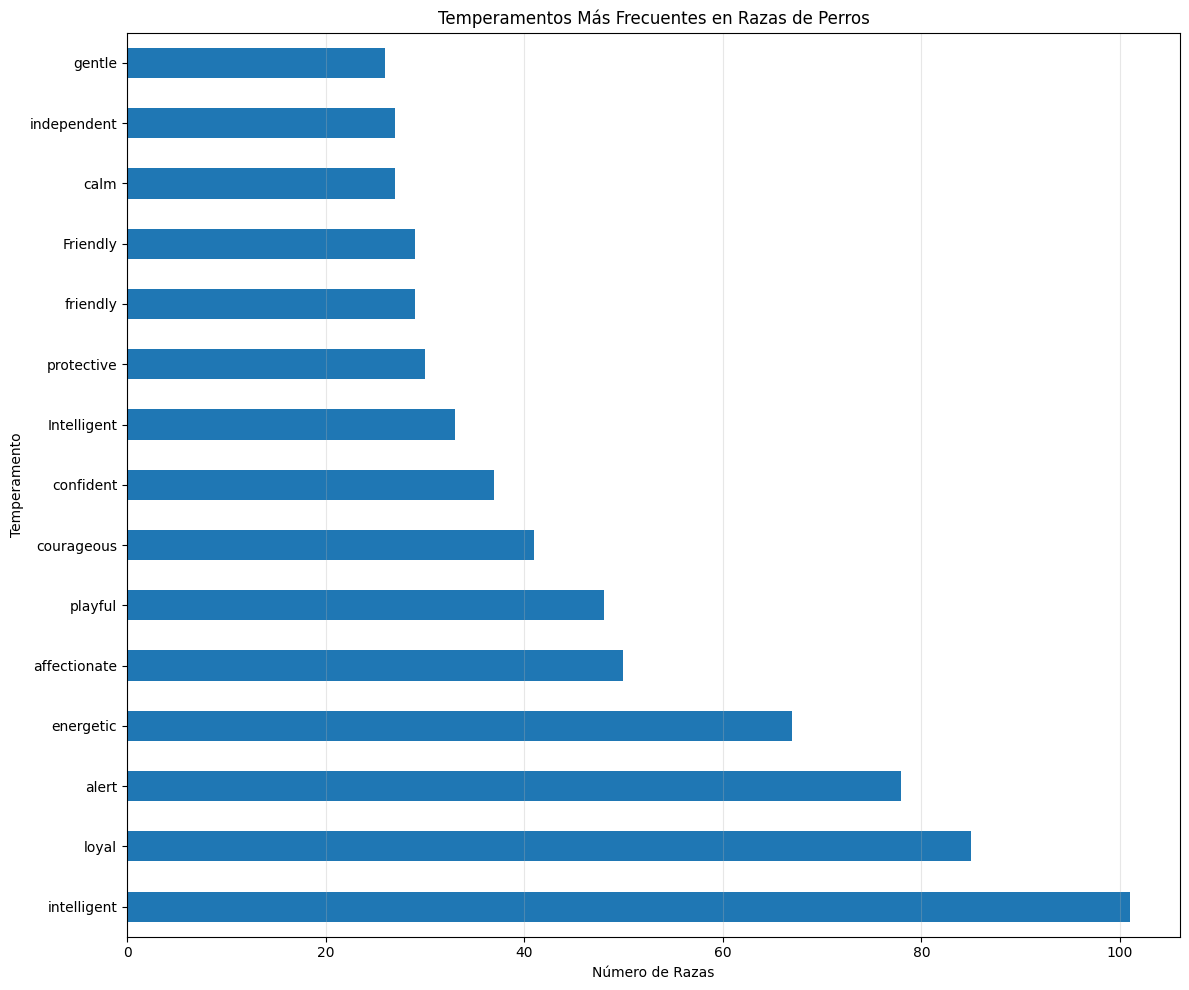

In [77]:


plt.figure(figsize=(12, 10))
temperamentos_top.plot(kind='barh')
plt.title('Temperamentos Más Frecuentes en Razas de Perros')
plt.xlabel('Número de Razas')
plt.ylabel('Temperamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


In [ ]:
# tu mama